In [1]:
# 25 nm - 1550 nm

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
from numpy.lib.scimath import sqrt as csqrt
from IPython.display import display, Math, clear_output

###############################################################
#LINUX PATH

# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/Ring-Resonator/Tutorial/')) #Current directory

###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('D:/AAAAAAAArquivos/Facul/Capacitação/GitHub/BraggGrating'))
spec_win.loader.exec_module(lumapi)


def fwhm(band, reflection, dB):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(reflection)
    rmax = reflection[peak[np.argmax(reflection[peak])]]

    if dB == True: 
        dB = 3
        rmax = rmax-dB
    else: 
        dB = 0 
        rmax = rmax/2

    for i in range(0, len(band)):
        if (reflection[i] <(rmax) and reflection[i+1] > (rmax)):
            min = i
            break

    for i in range(int(band[-1]/2), len(band)):
        if (reflection[i] > (rmax) and reflection[i+1] < (rmax)):
            max = i
            break
    print('FWHM = '+ str(np.round((band[max]-band[min])*1e9,4)) + 'nm')

    dots = [band[min]*1e9,reflection[min],band[max]*1e9, reflection[max]]
    
    return dots,min,max


C:\Users\lecob\AppData\Local\Temp\ipykernel_16584\225875404.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
band = np.linspace(1500*1e-9, 1600*1e-9, 20000)
Cband = np.linspace(1530*1e-9, 1565*1e-9, 20000)

# Python Theoretical Graphics

Using 0.45µm Width

In [3]:
mode = lumapi.MODE()

In [4]:
# Getting Neff and Ng
mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 400,
    'mesh cells z': 400,
})
mode.run()

{!!}



C:\Program Files\Lumerical\v202\api\python\lumapi.py:138: UserWarning: Multiple objects named '::model::rectangle'. Use of this object may give unexpected results.
  warnings.warn(message)


In [10]:
# Constants

lambda_B = 1550e-9
pi = np.pi
c0 = 299792458
neff = 2.27
k0 = 2*pi/lambda_B
ng = 4.60
FWHM = 25e-9
beta = k0*neff
gratingPeriod = lambda_B/(2*neff)

C:\Users\lecob\AppData\Local\Temp\ipykernel_16584\3583791069.py:15: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)


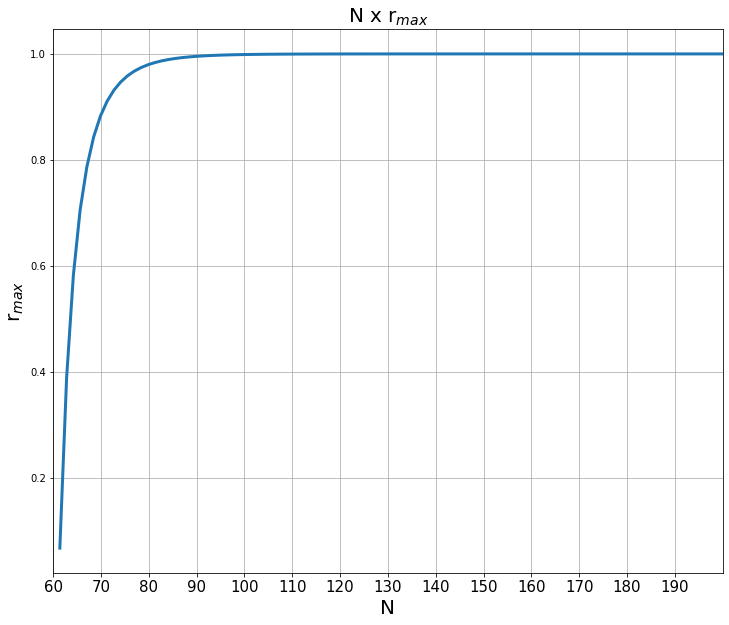

In [38]:
# Getting the Lenght and number of periods
figure1 = plt.figure(figsize=(12, 10))

N = np.linspace(60,200,100)

plt.grid()
plt.title('N x r$_{%s}$' %('max'), size = 20)
plt.ylabel('r$_{%s}$' %('max'), size = '20')
plt.xlabel('N', size = '20')
plt.xlim(N[0], N[-1])
plt.xticks(np.arange(N[0], N[-1], 10), size = '15')


L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2
plt.plot(N, rmax, linewidth = 3)

figure1.savefig('N_x_rmax.png')

In [111]:
N = 90
L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2

deltaNeff = k*lambda_B/2
print('rmax = ' + str(rmax))
print('L = ' + str(L*1e6) + 'um')
print('delta neff = ' + str(deltaNeff))

rmax = 0.9954500511497567
L = 30.726872246696036um
delta neff = 0.08546114643017334


In [47]:
mode = lumapi.MODE()

In [4]:
# Getting Neff X DeltaW graph

mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 200,
    'mesh cells z': 200,
})


In [ ]:
a = 20
deltaW = np.linspace(0,150e-9, a)

neff1 = np.zeros(a)
neff2 = np.zeros(a)

mode.switchtolayout()

#neff1 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.45e-6 + deltaW[i])
    mode.run()
    mode.findmodes()
    neff1[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 (' + str(i+1)+ '/' + str(a) + ') Done')

#neff2 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.45e-6 - deltaW[i])
    mode.run()
    mode.findmodes()
    neff2[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 ({}/{}) Done'.format(a,a))
    print('Neff2 (' + str(i+1)+ '/' + str(a) + ') Done')

[0.00000000e+00 7.89473684e-09 1.57894737e-08 2.36842105e-08
 3.15789474e-08 3.94736842e-08 4.73684211e-08 5.52631579e-08
 6.31578947e-08 7.10526316e-08 7.89473684e-08 8.68421053e-08
 9.47368421e-08 1.02631579e-07 1.10526316e-07 1.18421053e-07
 1.26315789e-07 1.34210526e-07 1.42105263e-07 1.50000000e-07]


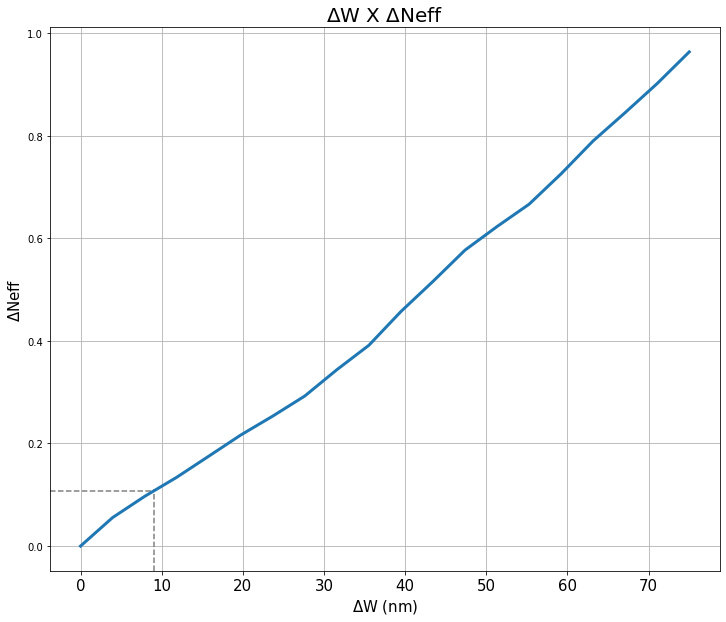

In [105]:
figure2 = plt.figure(figsize=(12, 10))
deltaNeff = neff1 - neff2
plt.grid()
plt.title('$\Delta$W X $\Delta$Neff', size = 20)
plt.xlabel('$\Delta$W (nm)', size = '15')
plt.ylabel('$\Delta$Neff', size = '15')
plt.axhline(y=0.1064, xmax = 0.15, linestyle='--', color = 'grey')
plt.axvline(x=9, ymax=(0.15), linestyle='--', color = 'grey')
plt.xticks(size = '15')
plt.plot(deltaW*1e9/2, deltaNeff, linewidth = 3)
print(deltaW)
figure2.savefig('DeltaW_x_DeltaNeff.png')